In [0]:
!pip install tensorflow-gpu==2.1.0

In [0]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [0]:
df = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
df.shape

(7254, 27)

In [0]:
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
img_width = 350
img_height = 350

X = []
for i in tqdm(range(df.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(img_width,img_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)
X = np.array(X)

100%|██████████| 7254/7254 [00:32<00:00, 224.58it/s]


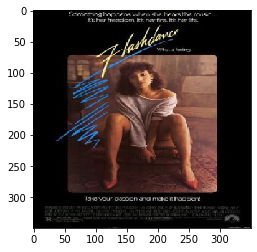

In [0]:
plt.imshow(X[1])

In [0]:
df['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [0]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(7254, 25)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.15)

In [0]:
X_train[0].shape

(350, 350, 3)

## Build CNN

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
model.add(Dense(25,activation='sigmoid'))

In [0]:
model.compile(optimizer=Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/10
6165/6165 [==============================] - 393s 64ms/sample - loss: 0.8031 - accuracy: 0.5301 - val_loss: 3.4515 - val_accuracy: 0.8247
Epoch 2/10
6165/6165 [==============================] - 401s 65ms/sample - loss: 0.7414 - accuracy: 0.5650 - val_loss: 5.0091 - val_accuracy: 0.8291
Epoch 3/10
6165/6165 [==============================] - 395s 64ms/sample - loss: 0.6790 - accuracy: 0.6253 - val_loss: 6.4247 - val_accuracy: 0.8173
Epoch 4/10
6165/6165 [==============================] - 399s 65ms/sample - loss: 0.5928 - accuracy: 0.7181 - val_loss: 8.3468 - val_accuracy: 0.7332
Epoch 5/10
6165/6165 [==============================] - 394s 64ms/sample - loss: 0.5038 - accuracy: 0.8089 - val_loss: 5.4650 - val_accuracy: 0.7046
Epoch 6/10
6165/6165 [==============================] - 396s 64ms/sample - loss: 0.4231 - accuracy: 0.8646 - val_loss: 2.9796 - val_accuracy: 0.7714
Epoch 7/10
6165/6165 [==============================] - 39

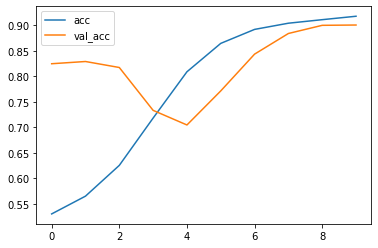

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])